# Анализ активности пользователей сервиса проката самокатов GoFast

### Цель исследования

Проанализировать данные о пользователях, их типах подписки и поездках, проверить следующие гипотезы:
1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Верно ли, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Является ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
4. Определение метода проверки гипотезы по заданным условиям.

### Данные

Для анализа были получены данные о некоторых пользователях из нескольких городов, а также об их поездках, типах подписки и тарифах.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

<b>Описание данных</b>

Пользователи — users_go.csv

- user_id уникальный идентификатор пользователя
- name имя пользователя
- age возраст
- city город
- subscription_type тип подписки (free, ultra)

Поездки — rides_go.csv

- user_id уникальный идентификатор пользователя
- distance расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date дата совершения поездки

Подписки — subscriptions_go.csv

- subscription_type тип подписки
- minute_price стоимость одной минуты поездки по данной подписке
- start_ride_price стоимость начала поездки
- subscription_fee стоимость ежемесячного платежа


### План работ

1. Обзор и предварительная обработка данных.
2. Провести исследовательский анализ данных. Проанализировать и визуализировать данные о пользователях и поездках:
 - частота встречаемости городов;
 - соотношение пользователей с подпиской и без подписки;
 - возраст пользователей;
 - расстояние, которое пользователь преодолел за одну поездку;
 - продолжительность поездок.
3. Объединить данные о пользователях, поездках и подписках в один датафрейм. На основе объедененного датафрейма создать два новых датафрейма:
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской.
4. Визуализировать данные о поездках для обеих категорий пользователей.
5. Рассчитать суммарные расстояние, количество поездок и их время для каждого пользователя за каждый месяц.
6. Добавить в датафрейм столбец с суммарной помесячной выручкой, которую принёс каждый пользователь.
7. Проверить гипотезы, описанные выше.
8. Ответить на дополнительные вопросы.
9. Итоговые выводы.

### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
from math import factorial, sqrt
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

### Шаг 1. Загрузка данных

In [2]:
#загрузка данных и сохранение их в переменные

users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Приступим к обзору данных

#### Данные о пользователях

In [3]:
# вывод первых 5 строк датасета
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
# вывод общей информации о датасете
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датафрейме представлена информация о пользователях, их имена, возраст, город и тип подписки.
В данных нет пропусков, типы данных определены корректно.

#### Данные о поездках

In [5]:
# вывод первых 5 строк датасета

rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
# вывод общей информации о датасете

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датафрейме представлена информация о поездках, их даты, продолжительность и дистанция, а также id пользователя, совершившего поездку.
В данных нет пропусков, типы данных определены корректно в столбцах user_id, distance, duration. В столбце date необходимо заменить тип данных на DateTime.

In [7]:
# замена типа данных в столбце date на datetime

rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [8]:
# вывод общей информации о датасете для проверки корректности замены типа данных

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Тип данных успешно изменен на корректный DateTime.

#### Данные о подписках

In [9]:
# вывод первых 5 строк датасета

subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
# вывод первых 5 строк датасета

subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафрейме представлена информация о подписках, их тип, стоимость старта и минуты поездки, стоимость ежемесячного платежа в подписке.
В данных нет пропусков, типы данных определены корректно.

#### Промежуточный вывод:

Изучив общую информацию о датасетах можно сделать вывод, что пропусков в данных нет, в целом типы данных корректны, в датасете с данными о поездках тип данных о дате поездки был приведен к корректному DateTime. Можно приступать к предобработке данных.

### Шаг 2. Предобработка данных

#### Добавление столбца с номером месяца

В датасете должны быть данные только за 2021 год. Проверим минимальное и максимальное значение в столбце date.

In [11]:
# вывод минимального значения столбца date

rides['date'].sort_values().min()

Timestamp('2021-01-01 00:00:00')

In [12]:
# вывод максимального значения столбца date

rides['date'].sort_values().max()

Timestamp('2021-12-30 00:00:00')

В датсете представлены данные начиная с 1 января и заканчивая 30 декабря 2021 года. Это полностью удовлетворяет условиям исследования.

Для последующего анализа необходимо добавить в данные столбец с номером месяца в датасете с информацией о поездках.

In [13]:
# добавление нового столбца с номером месяца, который выделяем из столбца date

rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Проверка на наличие явных дубликатов

Проверим данные на наличие явных дубликатов. Первым проверим датасет с информацией о пользователях.

In [14]:
# подсчет строк-дубликатов

users.duplicated().sum()

31

В датасете 31 строка с дублирующимися данными. Удалим дубликаты.

In [15]:
# удаление строк дубликатов

users = users.drop_duplicates().reset_index(drop = True)

# удаление повторный подсчет дублирующихся строк для проверки
users.duplicated().sum()

0

Теперь проверим датасет с данными о поездках на наличие явных дубликатов.

In [16]:
rides.duplicated().sum()

0

В датасете не найдено дублирующих строк. 
Датасет с данными о подписках проверять не имеет смысла, так как он содержит только 2 строки с описанием двух типов подисок.

#### Проверка на наличие неявных дубликатов

Проверим данные в датасете о пользователях на наличие неявных дубликатов. Сначала проверим значения в столбце city.

In [17]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В столбце с наименованиями городов только уникальные значения. Проверим столбец с именами пользователей.

In [18]:
print(sorted(users['name'].unique()), sep = '')

['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья', 'Инна', 'Ирина', 'Камилла', 'Карина', 'Каролина', 'Кира', 'К

 В даных есть схожие имена - Даниил, Данил, Данила, Даниэль; Наталия, Наталья, Наташа; София, Софья. Это могут быть неявные дубликаты. Проверим имена в связке с id пользователя.

In [19]:
# проверка на наличие неявных дубликатов
print('Дубликаты строк с совпадением значений колонок name и user_id',users.duplicated(subset=['name','user_id']).sum())

Дубликаты строк с совпадением значений колонок name и user_id 0


Неявных дубликатов необнаружено, можно приступать к анализу данных.

#### Проверка на аномальные значения

Посмотрим на разброс значений в данных о расстоянии поездок.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

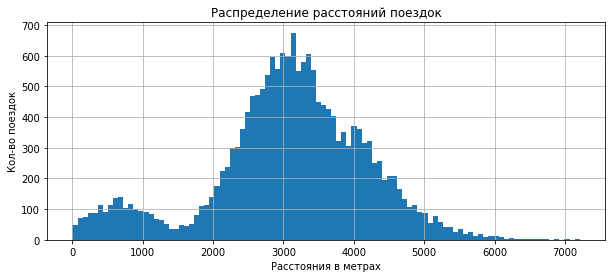

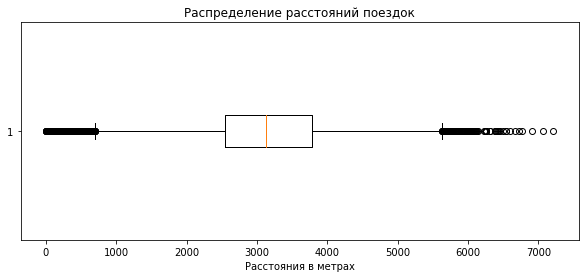

In [20]:
# выводим гистограмму по столбцу distance
rides['distance'].hist(figsize=(10, 4), bins=100)
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояния в метрах')
plt.ylabel('Кол-во поездок')

# выводим boxplot по столбцу distance
plt.figure(figsize=(10, 4))

# выводим boxplot по столбцу distance
plt.boxplot(rides['distance'], vert=False)
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояния в метрах')

# выводим информацию по столбцу distance
rides['distance'].describe()

В данных о расстояниях поездок есть аномальные значения. Есть поездки с расстоянием менее метра и более 7000 метров. 
Посмотрим на данные о продолжительности поездок.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

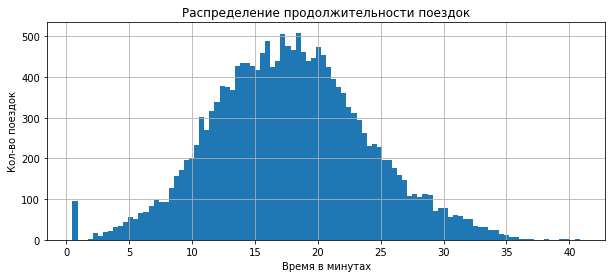

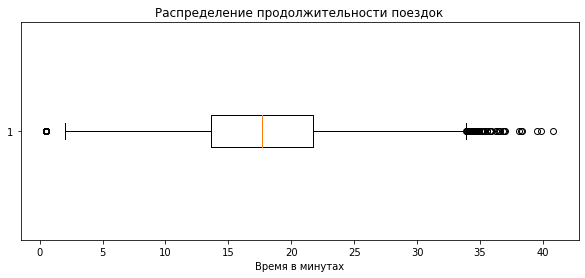

In [21]:
# выводим гистограмму по столбцу duration
rides['duration'].hist(figsize=(10, 4), bins=100)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Кол-во поездок')

# выводим boxplot по столбцу duration
plt.figure(figsize=(10, 4))
plt.boxplot(rides['duration'], vert=False)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Время в минутах')

# выводим информацию по столбцу duration
rides['duration'].describe()

В данных о времени поездок также есть выбивающиеся значения - поездки менее 1 минуты и более 35 минут. 
Выведем такие поездки в таблицу, чтобы посмотреть на них поближе.

In [22]:
# снятие ограничения на количество строк для вывода
pd.set_option('display.max_rows', None)

# фильтруем строки с данными о поездках менее 1 минуты и более 35 минут
rides.query('duration < 1 or duration > 35')

,user_id,distance,duration,date,month
42,4,4649.488243,35.896929,2021-08-14,8
143,15,4187.621459,38.125729,2021-01-13,1
499,55,4151.081878,36.906491,2021-06-30,6
524,58,4763.920660,35.819603,2021-02-17,2
854,91,4444.579979,35.222900,2021-11-05,11
1111,119,4060.082639,35.360496,2021-05-15,5
1455,158,3967.285849,35.803715,2021-05-09,5
1621,174,3794.401307,35.766408,2021-12-23,12
1694,183,4473.798120,36.402535,2021-01-02,1
1894,205,4218.386189,36.310317,2021-08-26,8


В данных с продолжительностью поездки более 35 минут проблем нет, расстояния вполне соответствуют времени поездки. А вот в данных о поездках менее 1 минуты явно есть несоответствие указанного времени и расстояния поездки. Расстояние поездок более 4, 5 и даже 6 км, а время везде 0,5 минуты. Это может быть какой-либо технический сбой в подсчете времени поездок, ошибка при выгрузке данных или это могут быть поездки в рамках какой-либо акции с бесплатными минутами или бонусами.

Подсчитаем количество строк с временем поездки менее минуты.

In [23]:
# вывод количества строк с временем поездки менее 1 минуты
rides.query('duration < 1').shape[0]

95

Таких строк 95. Удалять эти строки мы не будем, т.к. в них присутствует важная информация для последующего анализа. Однако при дальнейшем анализе продолжительности поездок необходимо будет учитывать эти данные.

#### Округление значений

В данных о расстояниях и времени поездки значения указаны с 6-ю знаками после запятой. Для удобства восприятия и анализа округлим значения столбцов 'distance' до 2-х знаков после запятой.

In [24]:
# округление значений
rides['distance'] = rides['distance'].round(2)

# вывод первых строк для проверки результата
rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


#### Промежуточный вывод

Изучив информацию в датасетах были внесены исменения:
- удалены 31 строки-дубликаты из данных о пользователях;
- проверен период за который представлены данные - все данные за 2021 год;
- добавлен столбец с номером месяца для удобства последующего анализа;
- данные о расстояниях и продолжительности поездок изучены на наличие аномальных значений, все значения оставлены в датасете для дальнейшего подробного исследования.
- в данных о продолжительности поездок обнаружено несоответствие времени и расстояний поездок - есть строки с большими по расстоянию поездками и временем поездки менее минуты. Эти строки оставлены без изменений, т.к. мы не знаем причин такого значения времени (это могут быть технические сбои при подсчете времени, ошибки выгрузки, акции с бесплатными минутами или бонусами), но в этих строках есть другие важные для анализа данные и поэтому мы их не удаляем.

In [25]:
# Комментарий ревьюера
temp = rides.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

Выведем данные о количестве пользователей приложения в разбивке по городам. Для удобства анализа добавим столбец с долей количества пользователей в каждом городе от общего.

In [26]:
# подсчет количества пользователей по городам

users_by_city = (users.groupby('city')['user_id'].count().reset_index()
                 .rename(columns={'city': 'Город', 'user_id': 'Кол-во пользователей'})
                 .sort_values(by='Кол-во пользователей', ascending=False))

In [27]:
# подсчет общего количества пользователей
total_users = users_by_city['Кол-во пользователей'].sum()

# добавление столбца с долей пользователей в каждом городе
users_by_city['% пользователей'] = (users_by_city['Кол-во пользователей'] / total_users) * 100
users_by_city['% пользователей'] = users_by_city['% пользователей'].round(2)

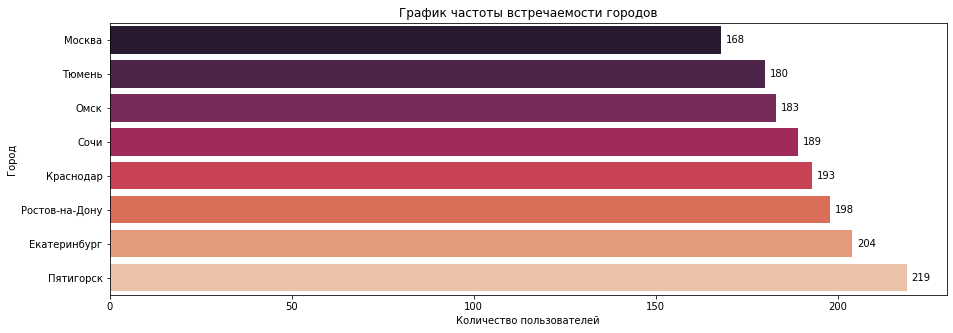

,Город,Кол-во пользователей,% пользователей
4,Пятигорск,219,14.28
0,Екатеринбург,204,13.30
5,Ростов-на-Дону,198,12.91
1,Краснодар,193,12.58
6,Сочи,189,12.32
3,Омск,183,11.93
7,Тюмень,180,11.73
2,Москва,168,10.95


In [28]:
# визуализация распределения пользователей по городам

plt.figure(figsize=(15, 5))
ax = sns.countplot(y='city', data=users, order=users['city'].value_counts(ascending=True).index, palette='rocket')

# добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')


plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.title('График частоты встречаемости городов')

# вывод визуализации
plt.show()

# вывод таблицы с данными
users_by_city

Наибольшее количество пользователей приложения проживают в Пятигорске (14.28%) и Екатеринбурге (13.3%). Наименьшее количество пользователей приложения в Москве (10.95%). Это может быть обусловлено неоднородностью выборки или неревномерной конкуренцией среди сервисов проката самокатов, например в Москве конкуренция гораздо выше, чем в Пятигорске и потому меньший объем пользователей.

#### Соотношение количества пользователей с подпиской и без

В данных представлено два типа подписоки:
 - free — подписки нет(цены за минуту поездки выше, оплата за старт поездки);
 - ultra — подписка есть (есть абонентская помесячная плата, цены за минуту поездки ниже, бесплатный старт поездки).

Рассчитаем соотношение количества пользователей в обеих категориях.

In [29]:
# подсчет количества пользователей по типу подписки

users_by_subscription = (users.groupby('subscription_type')['user_id'].count().reset_index()
                 .rename(columns={'subscription_type': 'Тип подписки', 'user_id': 'Кол-во пользователей'})
                 .sort_values(by='Кол-во пользователей', ascending=False))

In [30]:
# добавление столбца с долей пользователей в каждом городе
users_by_subscription['% пользователей'] = (users_by_subscription['Кол-во пользователей'] / total_users) * 100
users_by_subscription['% пользователей'] = users_by_subscription['% пользователей'].round(2)

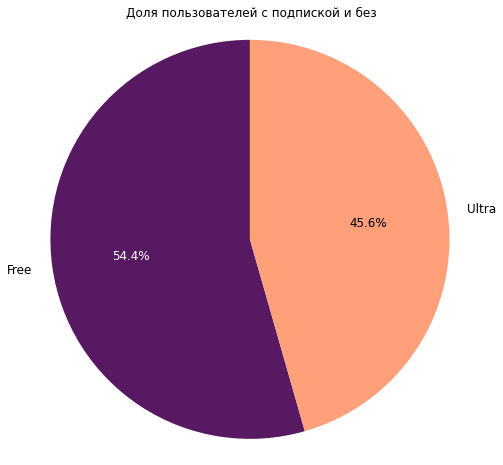

,Тип подписки,Кол-во пользователей,% пользователей
0,free,835,54.43
1,ultra,699,45.57


In [31]:
# построение визуализации
# подсчет количества пользователей по типам подписки
users_with_subscription = users[users['subscription_type'] == 'ultra'].shape[0]
users_without_subscription = users[users['subscription_type'] == 'free'].shape[0]

# данные для диаграммы
labels = ['Free', 'Ultra']
sizes = [users_without_subscription, users_with_subscription]
colors = ['#571962', '#ffa07a']  # Цвета сегментов
text_colors = ['white', 'black']  # Цвета текста внутри сегментов

# построение круговой диаграммы
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
    textprops={'fontsize': 12}
)

# изменение цвета текста внутри сегментов
for autotext, color in zip(autotexts, text_colors):
    autotext.set_color(color)

plt.title('Доля пользователей с подпиской и без')
plt.axis('equal')

# вывод визуализации
plt.show()

# вывод таблицы с данными
users_by_subscription


Большинство пользователей сервиса не оформляют подписку - 54,43%.Однако доля пользователей с подпиской не сильно уступает пользователям без подписки - 45,57%. 
Посмотрим есть ли существенная разница в соотношении пользователей с подпиской и без в разбивке по городам.

<Figure size 864x576 with 0 Axes>

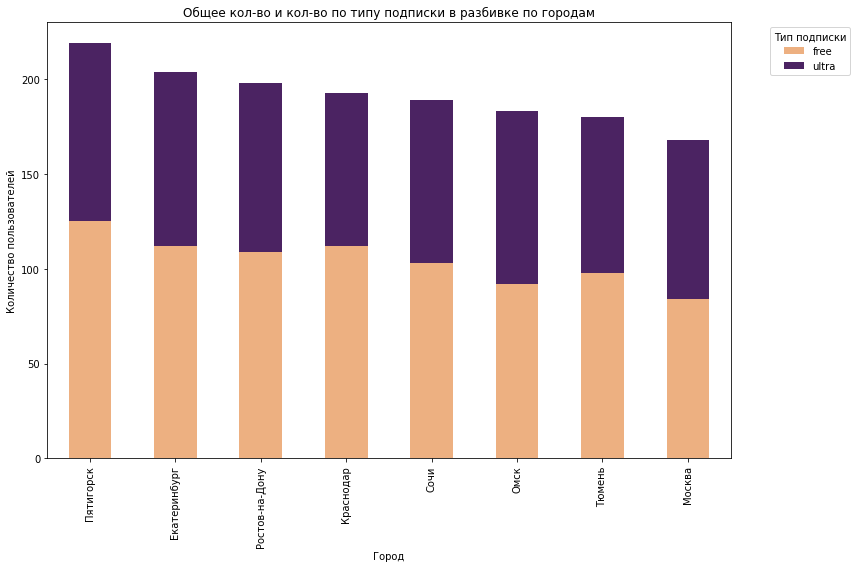

In [32]:
# группировка данных по городам и типу подписки
subscription_by_city = users.groupby(['city', 'subscription_type']).size().reset_index(name='count')

# создание сводной таблицы для удобства построения графика
pivot_subscription_by_city = subscription_by_city.pivot(index='city', columns='subscription_type', values='count').fillna(0)

# сортировка по общему количеству пользователей
pivot_subscription_by_city = pivot_subscription_by_city.loc[
    pivot_subscription_by_city.sum(axis=1).sort_values(ascending=False).index
]

# построение графика
plt.figure(figsize=(12, 8))
pivot_subscription_by_city.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='flare')
plt.title('Общее кол-во и кол-во по типу подписки в разбивке по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# вывод визуализации
plt.show()

Практически во всех городах количество пользователей без подписки выше, чем пользователей с подпиской. Только в Москве и Омске пользователи распределились практически поровну.

#### Распределение пользователей по городам

Для начала посмотрим сводные данные по столбцу 'age'.

In [33]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

По данным видно, что пользуются услугами сервиса люди различного возраста. Стоит отметить, что в большинстве регионов возраст с которого разрешено пользоваться услугами проката самокатов 18 лет, в некоторых компаниях и регионах - с 14 лет при письменном разрешении родителей. Однако услугами сервиса GoFast, судя по данным, пользуются лица от 12 лет. Это является нарушением установленных норм.

Посмотрим какие возростные группы преобладают.

In [34]:
# группировка и подсчет количества пользователей по возрастам
users_age = (users.groupby('age')['user_id']
                 .count()
                 .reset_index()
                 .rename(columns={'age': 'Возраст', 'user_id': 'Количество пользователей'})
                 .sort_values(by='Возраст', ascending=False))

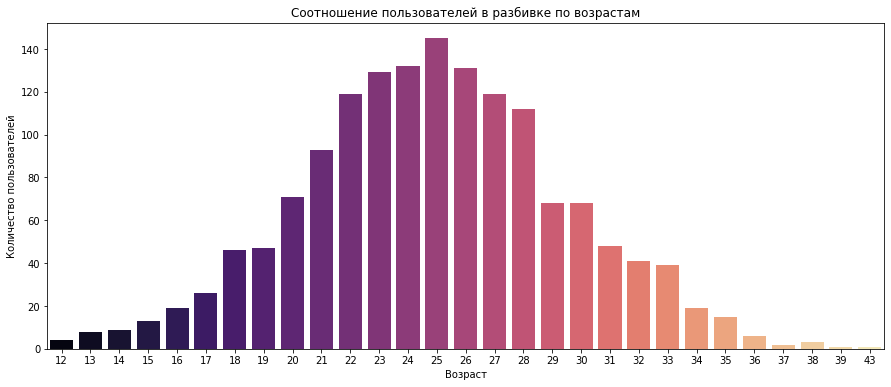

In [35]:
# построение графика
plt.figure(figsize=(15, 6))
sns.barplot(x=users_age['Возраст'], y=users_age['Количество пользователей'], palette='magma')
plt.title('Соотношение пользователей в разбивке по возрастам')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')

plt.show()

По данным видно что сервисом приемущественно пользуются люди в возрасте от 22 до 28 лет, наибольшее количество пользователей в возрасте 25 лет. Пользователей моложе 15 и старше 35 очень мало.

#### Распределение поездок по расстоянию

Для начала посмотрим сводные данные по столбцу 'distance'.

In [36]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

Разброс расстояний поездок довольно велик - от менее 1 метра до более 7 км за поездку. Посмотрим внимательнее как часто пользователи совершают поездки на длинные и короткие расстояния.

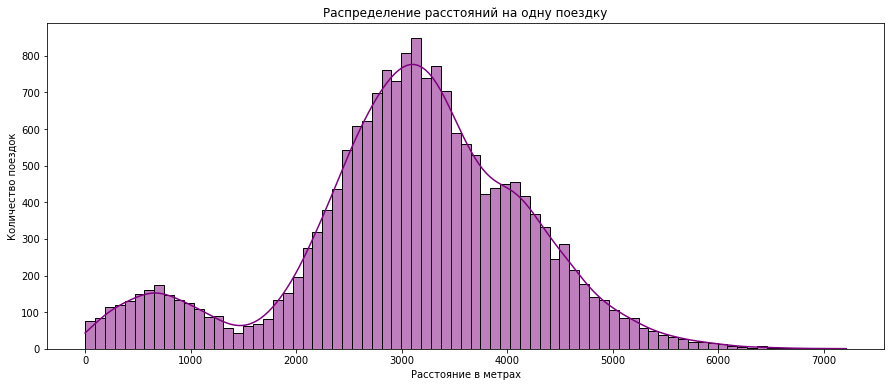

In [37]:
# построение визуализации
plt.figure(figsize=(15, 6))

sns.histplot(data=rides, x='distance', color='purple', kde=True)
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние в метрах')
plt.title('Распределение расстояний на одну поездку')

plt.show()

На графике видны два подъема (пика):
 - первый на уровне приблизительно 700 метров
 - второй на уровне 3000-3300 метров.
Поездки на расстояние более 5500 метров единичны.

Проверим есть ли зависимость расстояния поездки от месяца года (сезонности) и города проживания пользователя.

In [38]:
# группировка расстояний поездок по месяцам
distance_by_month = (rides.groupby('month')['distance']
                          .median().round()
                          .reset_index()
                          .rename(columns={
                               'month': 'Месяц', 
                               'distance': 'Расстояние'})
                          .sort_values(by='Месяц', ascending=False))

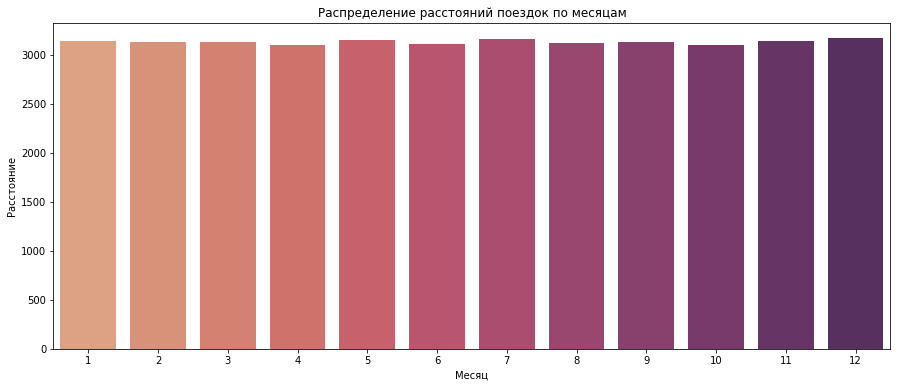

In [39]:
# построение графика
plt.figure(figsize=(15, 6))
sns.barplot(x=distance_by_month['Месяц'], y=distance_by_month['Расстояние'], palette='flare')
plt.title('Распределение расстояний поездок по месяцам')
plt.ylabel('Расстояние')
plt.xlabel('Месяц')

plt.show()

Медианное расстояние поездок на протяжении всех месяцев практически одинаково. Исходя из этого можно исключить сезонный фактор, влияющий на расстояние поездок.

Проверим есть ли зависимость длинны поездки от города проживания пользователя. Для этого нам необходимо объединить данные двух датасетов - users и riders.

In [40]:
# объединяем данные по столбцу user_id
users_riders = users.merge(rides, on = 'user_id', how = 'right')

In [41]:
# выводим общую информацию о новом датасете для проверки корректности объединения
users_riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


В новом датасете 18068 строк, столько же было в датасете riders (бОльшем по количеству строк), во всех сталбцах нет пропусков, заполнены все 18068 строк.

In [42]:
# группировка расстояний поездок по городам
distance_by_city = (users_riders.groupby('city')['distance']
                          .median().round()
                          .reset_index()
                          .rename(columns={
                               'city': 'Город', 
                               'distance': 'Расстояние'})
                          .sort_values(by='Город', ascending=False))

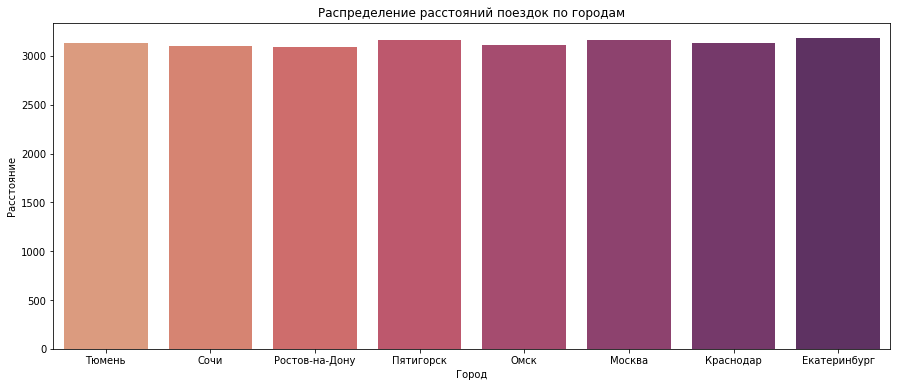

In [43]:
# построение графика
plt.figure(figsize=(15, 6))
sns.barplot(x=distance_by_city['Город'], y=distance_by_city['Расстояние'], palette='flare')
plt.title('Распределение расстояний поездок по городам')
plt.ylabel('Расстояние')
plt.xlabel('Город')

plt.show()

В распределении медианного расстояния поездок по городам тоже нет перекосов, у всех городов значения практически равны. Исходя из этого можно исключить фактор влияния размеров города на расстояние поездок.

Значительные отличия в расстоянии поездок по пикам могут быть различны, например короткие поездки могут совершать пользователи, которым нужно добраться от остановки до дома/офиса, до ближайшего магазина или учебного заведения, между остановками пересадки транспорта, а более продолжительные поездки могут совершать с целью прогулки, напрмер катаясь по паркам города. Для получения более точной информации необходимо изучить более детализированные данные, например, о маршрутах, местах старта и окончания поездки, погоде, времени суток и дня недели.

Посмотрим на распределение расстояний поездок детальнее.

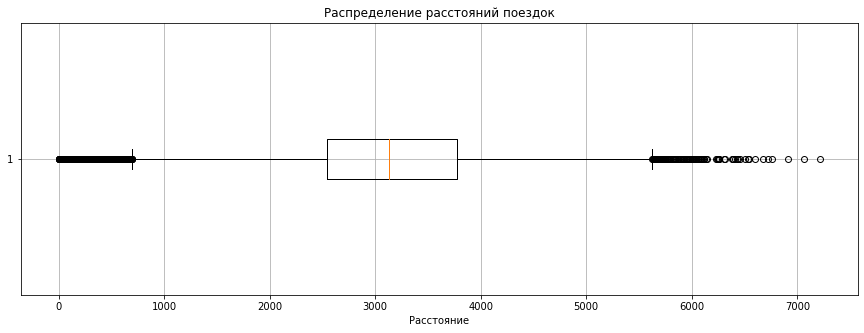

In [44]:
# построение визуализации
plt.figure(figsize=(15, 5))
plt.boxplot(rides['distance'], vert=False)
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние')
plt.grid(True)
plt.show()

Нижним пределом допустимых значений для расстояния поездки является отметка в приблизительно 700 метров. В диапазоне от 2500 метров до приблизительно 3800 расположена основная масса значений. Правая граница (верхний предел) допустимых значений находится на отметке в приблизительно 5600 метров. Медиана всех поездок находиться на отметке в приблизительно 3100 метров.

Поездки менее 700 метров и более 5700 метров крайне редки в сравнении с общим объемом. Однако такие поездки вполне реальны.

#### Распределение поездок по времени

Для начала посмотрим сводные данные по столбцу 'duration'.

In [45]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Разброс времени поездок также довольно велик - от менее 1 минуты до 40 минут за поездку. Посмотрим внимательнее как часто пользователи совершают длительные и короткие по времени поездки.

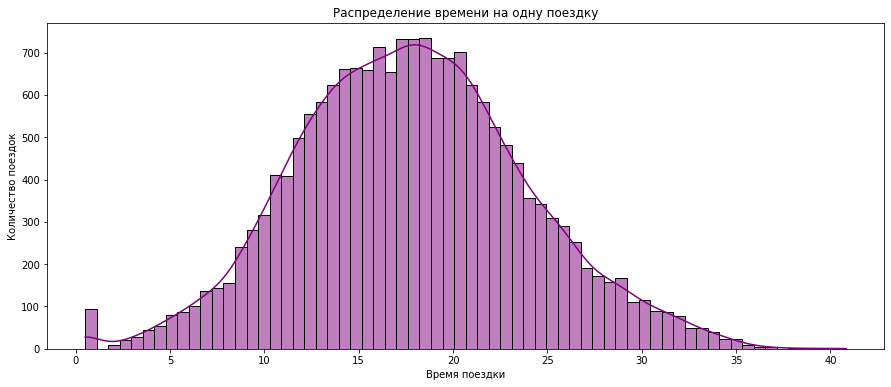

In [46]:
# построение визуализации
plt.figure(figsize=(15, 6))

sns.histplot(data=rides, x='duration', color='purple', kde=True)
plt.ylabel('Количество поездок')
plt.xlabel('Время поездки')
plt.title('Распределение времени на одну поездку')

plt.show()

Распределение поездок по времени похоже на нормальное. Максимальное количество поездок находится в диапазоне приблизительно от 13 до 22 минут.

Пик на отметке менее минуты - это поездки с некорректно указанным временем, которые мы обнаружили на этапе предобработки данных. Оставим их как есть.

Проверим есть ли зависимость продолжительности поездки от месяца года (сезонности) и города проживания пользователя.

In [47]:
# группировка расстояний поездок по месяцам
duration_by_month = (rides.groupby('month')['duration']
                          .median().round()
                          .reset_index()
                          .rename(columns={
                               'month': 'Месяц', 
                               'duration': 'Время поездки'})
                          .sort_values(by='Месяц', ascending=False))

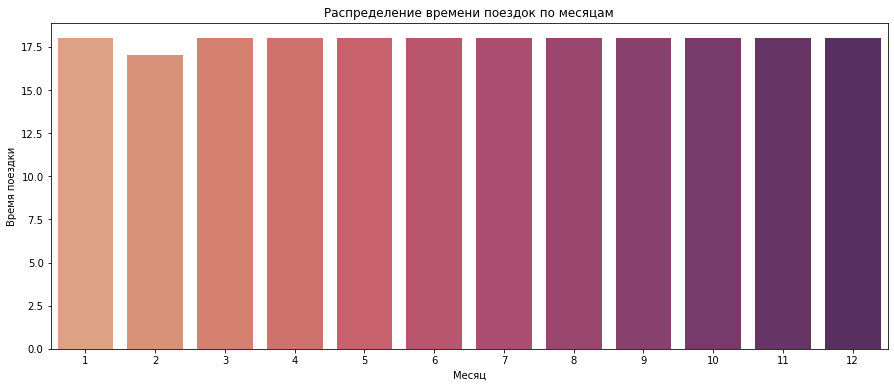

In [48]:
# построение графика
plt.figure(figsize=(15, 6))
sns.barplot(x=duration_by_month['Месяц'], y=duration_by_month['Время поездки'], palette='flare')
plt.title('Распределение времени поездок по месяцам')
plt.ylabel('Время поездки')
plt.xlabel('Месяц')

plt.show()

Медианное время поездок на протяжении всех месяцев практически одинаково, есть незначительное снижение в феврале. Исходя из этого можно исключить сезонный фактор, влияющий на время поездок.

Проверим есть ли зависимость времени поездки от города проживания пользователя.

In [49]:
# группировка расстояний поездок по городам
duration_by_city = (users_riders.groupby('city')['duration']
                          .median().round()
                          .reset_index()
                          .rename(columns={
                               'city': 'Город', 
                               'duration': 'Время поездки'})
                          .sort_values(by='Город', ascending=False))

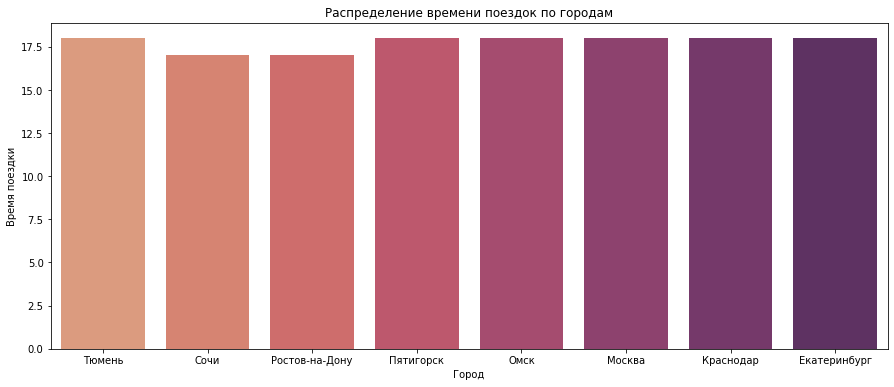

In [50]:
# построение графика
plt.figure(figsize=(15, 6))
sns.barplot(x=duration_by_city['Город'], y=duration_by_city['Время поездки'], palette='flare')
plt.title('Распределение времени поездок по городам')
plt.ylabel('Время поездки')
plt.xlabel('Город')

plt.show()

В распределении медианного времени поездок по городам тоже нет перекосов, у всех городов значения практически равны, немного ниже в Сочи и Ростове-на-Дону. Исходя из этого можно исключить фактор влияния размеров города на время поездок.

Посмотрим на распределение времени поездок детальнее.

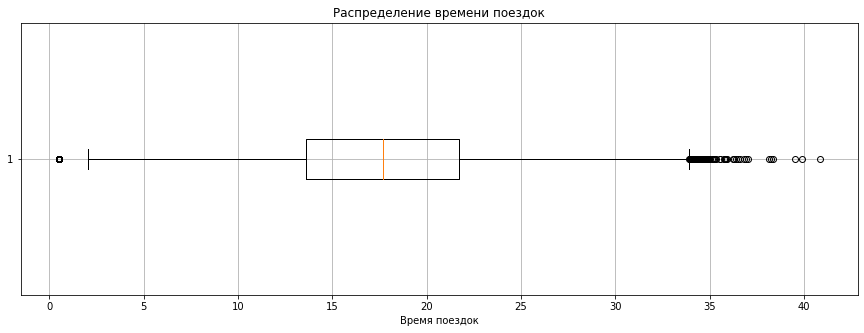

In [51]:
# построение визуализации
plt.figure(figsize=(15, 5))
plt.boxplot(rides['duration'], vert=False)
plt.title('Распределение времени поездок')
plt.xlabel('Время поездок')
plt.grid(True)
plt.show()

Нижним пределом допустимых значений для расстояния поездки является отметка в приблизительно 2-2,5 минуты. В диапазоне приблизительно от 13 до 22 минут расположена основная масса значений. Правая граница (верхний предел) допустимых значений находится на отметке в приблизительно 34 минуты. Медиана всех поездок находиться на отметке в приблизительно 17 минут.

Ранее, на этапе предобработки, мы выяснили, что в данных с продолжительностью поездки более 35 минут проблем нет, а в данных о поездках менее 1 минуты явно есть несоответствие указанного времени и расстояния поездки. Расстояние поездок более 4, 5 и даже 6 км, а время везде 0,5 минуты. Это может быть какой-либо технический сбой в подсчете времени поездок, ошибка при выгрузке данных или это могут быть поездки в рамках какой-либо акции с бесплатными минутами или бонусами. Для выяснения причин такого несоответствия времени и расстояний поездок понадобятся дополнительные данные для анализа.

Строк с несоответствием времени и расстояний поездок 95. Удалять эти строки мы не будем, т.к. в них присутствует важная информация для последующего анализа. Однако при дальнейшем анализе продолжительности поездок необходимо будет учитывать эти данные.

#### Промежуточный вывод

<b>Города</b>

В данных представлены информация о 8 городах, в которых работал сервис GoFast. Пятигорск имеет наибольшее количество пользователей 219, в то время как Москва представлена наименьшим количеством пользователей 168.

<b>Подписки</b>

В данных представлено два типа подписки:
- free (без помесячной платы, но с более высокими ценами за минуту и старт поездки)
- ultra (с помесячной платой, но с более низкими ценами за минуту и отсутствием стартовой платы)

Наибольшая доля пользователей не использует подписку - 54.4%, но пользователей с платной подпиской все таки довольно большое количество - 45.6%.

<b>Возраст пользователей</b>

Диапазон возрастов пользователей представлен значениями от 12 до 43 лет.
Средний возраст клиентов — 25 лет, основная масса подписчиков приходится на диапазон от 21 до 28 лет.

<b>Расстояние поездок</b>

Основная масса поездок находится в диапазоне от 2500 до 3100 метров, однако в данных есть выдающиеся значения (поездки более 5700 метров и менее 700 метров).
Взаимосвязи дистанций поездок с временем года и/или городом не обнаружено.

<b>Время поездок</b>

Основная масса поездок находится в диапазоне приблизительно от 13 до 22 минут, однако есть поездки продолжительностью до 2-х минут и около 40 минут.
Взаимосвязи продолжительности поездок с временем года и/или городом не обнаружено.
В данных есть поездки менее 1 минуты на расстояния более 4, 5 и даже 6 км. Это может быть какой-либо технический сбой в подсчете времени поездок, ошибка при выгрузке данных или это могут быть поездки в рамках какой-либо акции с бесплатными минутами или бонусами. Для выяснения причин такого несоответствия времени и расстояний поездок понадобятся дополнительные данные для анализа. Эти строки не удаляем и оставляем как есть, т.к. в них присутствует важная информация для последующего анализа.

### Шаг 4. Объединение данных

В предыдущем шаге мы объединили данные о пользователях и поездках, теперь необходимо присоединить к ним данные о подписках.

In [52]:
# объединяем данные о пользователях и поездках с данными о подписках
all_data = users_riders.merge(subscriptions, on = 'subscription_type', how = 'left')

In [53]:
all_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [55]:
all_data['user_id'].nunique()

1534

В исходных данных была информация о 1534 пользователях и 18068 поездках. После объединения, в общей таблице также получилось 18068 записей о поездках, на 1534 пользователей.
Пропусков в полученном датафрейме нет.

#### Создание датасетов пользователей с подпиской и без

In [56]:
# датафрейм пользователей без подписки
no_subscribe_users = all_data.query('subscription_type == "free"').reset_index(drop=True)

In [57]:
# датафрейм пользователей c подпиской
subscribe_users = all_data.query('~(subscription_type == "free")').reset_index(drop=True)

In [58]:
no_subscribe_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11568 entries, 0 to 11567
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [59]:
subscribe_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 609.5+ KB


Общая сумма стров в обоих таблицах 18068, как и было до разделения таблицы.

Пропусков в новых таблицах нет.

#### Данные о времени и расстояниях поездок для обеих категорий пользователей

Рассмотрим данные о длительности и расстояниях поездок в разбивке по типам подписок подробнее.

Text(0, 0.5, 'Время в минутах')

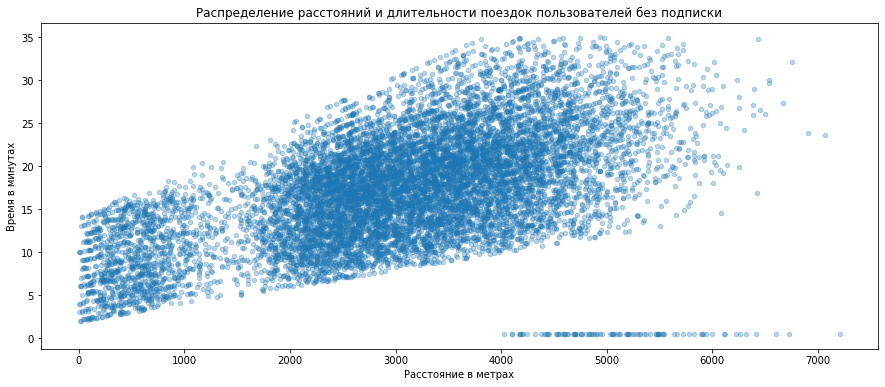

In [60]:
# строим график для пользователей без подписки
no_subscribe_users.plot(x='distance', y='duration', kind='scatter', alpha=0.3, figsize=(15, 6))
plt.title('Распределение расстояний и длительности поездок пользователей без подписки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Время в минутах')

Text(0, 0.5, 'Время в минутах')

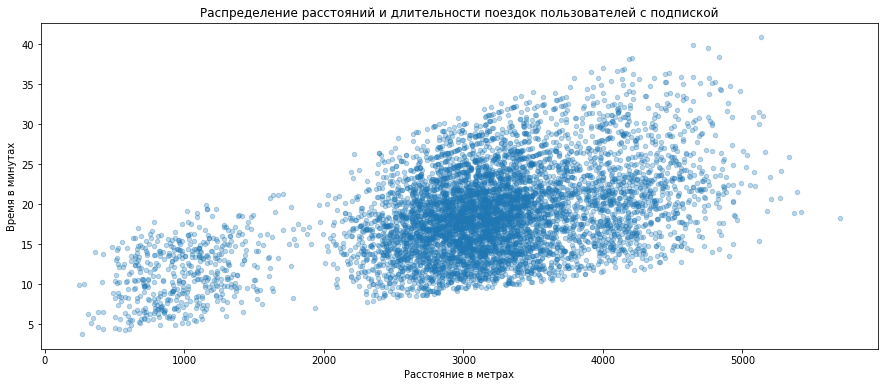

In [61]:
# строим график для пользователей с подпиской
subscribe_users.plot(x='distance', y='duration', kind='scatter', alpha=0.3, figsize=(15, 6))
plt.title('Распределение расстояний и длительности поездок пользователей с подпиской')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Время в минутах')

У пользователей без подписки более равномерное распределение поездок по времени и расстоянию.

Пользователи без подписки чаще совершают короткие поездки (до 1500 метров и до 15 минут), тажке они совершают более длинные поездки за короткий срок.
Пользователи с подпиской в основном совершают поездки приблизительно от 2500 до 3500 метров, также они совершают более длительные по времени поездки, но на расстояния короче, чем пользователи без подписки (до 5500 метров).

Посмотрим на данные по продолжительности поездок одновременно у пользователей с подпиской и без.

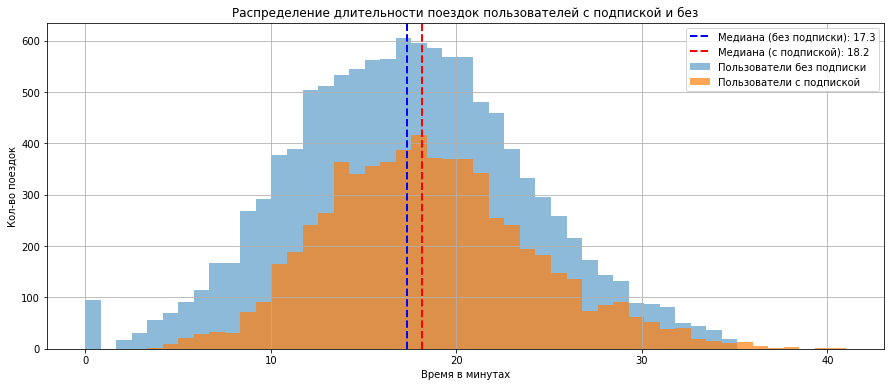

In [62]:
x = [no_subscribe_users['duration']]
y = [subscribe_users['duration']]

bins = np.linspace(0, 41)

plt.figure(figsize=(15, 6))

plt.hist(x, bins, alpha=0.5, label='Пользователи без подписки')
plt.hist(y, bins, alpha=0.7, label='Пользователи с подпиской')

# Вычисляем медианы
median_x = np.median(x)
median_y = np.median(y)

# Добавляем линии медиан
plt.axvline(median_x, color='blue', linestyle='dashed', linewidth=2, label=f'Медиана (без подписки): {median_x:.1f}')
plt.axvline(median_y, color='red', linestyle='dashed', linewidth=2, label=f'Медиана (с подпиской): {median_y:.1f}')

plt.title('Распределение длительности поездок пользователей с подпиской и без')
plt.xlabel('Время в минутах')
plt.ylabel('Кол-во поездок')
plt.legend(loc='upper right')
plt.grid() 
plt.show()

На графике видно что медиана продолжительности у пользователей без подписки чуть левее. Это подтверждает, что пользователи без подписки совершают более короткие по времни поездки.

Также на графике видно что все поездки продолжительностью менее 1 минуты приходятся на пользователей без подписки. 
Возможно это поездки совершенные в рамкай какой-либо акции с бесплатными минутами или поездками для новых пользователей или пользователей без подписки.

Исходя из этих данных можно предположить, что пользователи без подписки чаще совершают короткие поездки т.к. могут только знакомиться с сервисом, тестировать удобство приложения и самокаты. А более короткие по времени и длинные по расстоянию поездки могут быть обусловлены желанием поскорее завершить поездку и сэкономить деньги на поминутном тарифе.

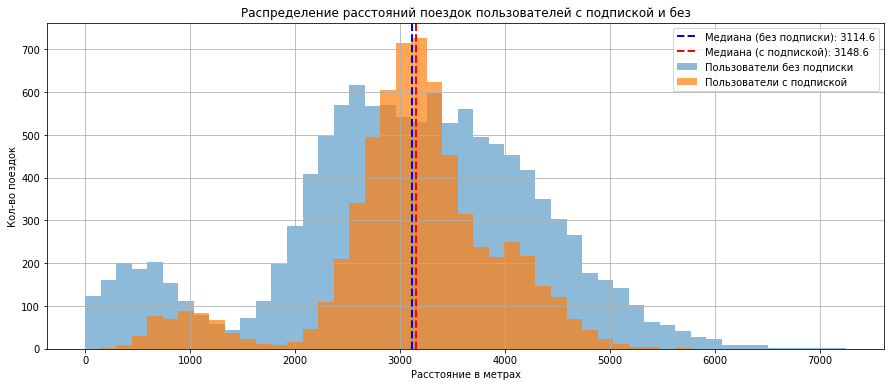

In [63]:
x = [no_subscribe_users['distance']]
y = [subscribe_users['distance']]

bins = np.linspace(0, 7250)

plt.figure(figsize=(15, 6))

plt.hist(x, bins, alpha=0.5, label='Пользователи без подписки')
plt.hist(y, bins, alpha=0.7, label='Пользователи с подпиской')

# Вычисляем медианы
median_x = np.median(x)
median_y = np.median(y)

# Добавляем линии медиан
plt.axvline(median_x, color='blue', linestyle='dashed', linewidth=2, label=f'Медиана (без подписки): {median_x:.1f}')
plt.axvline(median_y, color='red', linestyle='dashed', linewidth=2, label=f'Медиана (с подпиской): {median_y:.1f}')

plt.title('Распределение расстояний поездок пользователей с подпиской и без')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Кол-во поездок')
plt.legend(loc='upper right')
plt.grid() 
plt.show()

Данные совместного графика подтверждают, что пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской. Также на графике видно, что пользователи без подписки чаще совершают более далекие по расстоянию поездки. Разброс значений для пользователей без подписки более плавный. У пользователей с подпиской достаточно ярковыраженный пик на в диапазоне приблизительно 2900-3300 метров и потом резкое снижение.

При этом стоит отметить, что медианное значение расстояний поездок у обеих категорий очень близко - 3114 метров у пользователей без подписки и 3148 у пользователей с подпиской.

#### Промежуточный вывод

По данным видно, что существует существенное различие в поведении пользователей с подпиской и без.
Пользователи без подписки имеют более равномерное распределение как по времени, так и по расстоянию поездок. Они совершают чуть более длинные поездки за более короткое время, а также чаще совершают короткие по расстоянию и непродолжительные по времени поездки.

Пользователи с подпиской чаще совершают долгие по времени поездки, но на меньшее расстояние. Также пользователи с подпиской гораздо реже совершают короткие по расстоянию поездки.

Все поездки продолжительностью менее 1 минуты приходятся на пользователей без подписки. 
Возможно это поездки совершенные в рамкай какой-либо акции с бесплатными минутами или поездками для новых пользователей или пользователей без подписки.

Вероятно, пользователи без подписки, которые совершают короткие, но продолжительные поездки, включают в себя новых пользователей, которые только изучают сервис.

### Шаг 5. Подсчёт выручки

Перед подсчетом выручки округлим время поездок до минуты.

In [64]:
# округляем каждое значение из столбца duration до следующего целого числа 
all_data['duration'] = np.ceil(all_data['duration']) 

# выводим первые строки для проверки
all_data['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

Для дальнейшей работы нам необходимо отфильтровать данные, добавим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [65]:
# создаем сводную таблицу с помесячными данными
revenue_data = (all_data.pivot_table(index=['user_id','month'],
                            values=['city', 'subscription_type', 'distance', 'duration', 'date',
                                     'minute_price', 'start_ride_price', 'subscription_fee'],
                            aggfunc={'city': 'first', 
                                     'subscription_type': 'first',
                                     'distance': 'sum',
                                     'duration': 'sum',
                                     'date': 'count',
                                     'minute_price': 'first',
                                     'start_ride_price': 'first',
                                     'start_ride_price': 'first',
                                     'subscription_fee': 'first'
                                    }, fill_value=0)
            .rename(columns={'date': 'ride_count', 
                            'distance': 'distance_sum',
                            'duration': 'duration_sum',}))

# выводим результат для проверки
revenue_data.head()

city  ride_count  distance_sum  duration_sum  minute_price  \
user_id month                                                                 
1       1      Тюмень           2       7027.51            42             6   
        4      Тюмень           1        754.16             7             6   
        8      Тюмень           2       6723.47            46             6   
        10     Тюмень           2       5809.91            32             6   
        11     Тюмень           3       7003.50            56             6   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra

Сводная таблица создана, проверим ее на наличие пропусков.

In [66]:
# проверка на наличие пропусков
revenue_data.isna().sum()

city                 0
ride_count           0
distance_sum         0
duration_sum         0
minute_price         0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

Пропусков в данных нет.

Теперь необходимо добавить данные о помесячной выручке для каждого пользователя.

In [67]:
# рассчитываем помесячный доход от каждого пользователя и добавляем как новый столбец в датасет
#revenue_data['month_income'] = (
#                              (revenue_data['minute_price'] * revenue_data['duration_sum']) 
#                           + (revenue_data['ride_count'] * revenue_data['start_ride_price']) 
#                            +  revenue_data['subscription_fee'])

revenue_data['month_income'] = (revenue_data['start_ride_price'] * revenue_data['ride_count'] + 
                    revenue_data['minute_price'] * revenue_data['duration_sum'] + 
                    revenue_data['subscription_fee'])

# выводим результат для проверки
revenue_data.head()

city  ride_count  distance_sum  duration_sum  minute_price  \
user_id month                                                                 
1       1      Тюмень           2       7027.51            42             6   
        4      Тюмень           1        754.16             7             6   
        8      Тюмень           2       6723.47            46             6   
        10     Тюмень           2       5809.91            32             6   
        11     Тюмень           3       7003.50            56             6   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   

               month_income  
user_id month                
1       1               451  
        4               241  
        8               475  
        10              391  
        11              535

In [68]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               11331 non-null  object 
 1   ride_count         11331 non-null  int64  
 2   distance_sum       11331 non-null  float64
 3   duration_sum       11331 non-null  int64  
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
 7   subscription_type  11331 non-null  object 
 8   month_income       11331 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 842.1+ KB


Мы знаем, что правильная итоговая сумма выручки 3878641. Проверим расчеты и посчитаем общею сумму выручки.

In [69]:
revenue_data['month_income'].sum()

3878641

Выручка расчитана верно. Датасет с помесячными данными готов, можно приступать к проверке гипотез.

#### Промежуточный вывод

В датасете с объединенными данными были округлены значения столбца duration и расчитана помесячная выручка для каждого пользователя.

### Шаг 6. Проверка гипотез

#### Гипотеза 1: тратят ли пользователи с подпиской больше времени на поездки?

Необходимо проверить предположение, что пользователи с подпиской совершают более долгие поездки.

Для проверки этого предположения зададим условия нулевой и альтернативной гипотез:

 - Нулевая гипотеза - пользователи с подпиской ездят на самокатах одинаково или меньше пользователей без подписки.

 - Альтернативная гипотеза - пользователи с подпиской ездят на самокатах дольше.
 
 Заданим уровень статистической значимости равный 5% (0.05) и проведем двухвыборочный t-тест для независимых выборок.

In [70]:
# зададим параметры
alpha = 0.05 # устанавливаем уровень статистической значимости 5%

# задаем условия теста
results = st.ttest_ind(subscribe_users['duration'], 
                       no_subscribe_users['duration'], 
                       alternative='greater')

# выводим средние значения выборок
print('Среднее выборки с подпиской:', subscribe_users['duration'].mean())
print('Среднее выборки без подписки:', no_subscribe_users['duration'].mean())

# выводим р-значение
print('p-значение:', results.pvalue)

# выводим результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с подпиской: 18.54198516280583
Среднее выборки без подписки: 17.39090929866399
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


По данным теста пользователи с подпиской тратят на поездки в среднем больше времени, чем пользователи без подписки. Действительно, пользователи с подпиской тратят в среднем на ~1 минуту больше времени на поездки чем пользователи без подписки.

Отвергаем нулевую гипотезу.

#### Гипотеза 2: пользователи с подпиской проезжают не более 3130 метров за одну поездку.

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Для проверки этого предположения зададим условия нулевой и альтернативной гипотез:

 - Нулевая гипотеза - среднее расстояние поездок пользователей с подпиской равно 3130.

 - Альтернативная гипотеза - среднее расстояние поездок пользователей с подпиской превышает 3130.
 
 Заданим уровень статистической значимости равный 5% (0.05) и проведем одновыборочный t-тест.

In [71]:
# зададим параметры

prev_screens_value = 3130 # зададим значение истинного среднего

alpha = 0.05 # устанавливаем уровень статистической значимости 5%

# задаем условия теста
results = st.ttest_1samp(
    subscribe_users['distance'], 
    prev_screens_value,
      alternative='greater')

# выводим среднее значения выборки
print('Среднее выборки:', subscribe_users['distance'].mean())

# выводим р-значение
print('p-значение:', results.pvalue)

# выводим результат
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки: 3115.445430769231
p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


P-значение больше заданной статистической значимости, а значит гипотезу отвергнуть мы не можем. 

Также судя по среднему значению расстояний поездок пользователей с подпиской, оно действительно не превышает 3130. Это значает, что пользователи с подпиской не провоцируют быстрый износ самокатов из-за через чур продолжительных по расстоянию поездок.

#### Гипотеза 3: помесячная выручка пользователей с подпиской превышает выручку пользователей без подписки.

Необходимо проверить предположение о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Для проверки этой гипотезы нам нужно выделить данные о пользователях с подпиской и без из датасета включающего все исходные данные.

In [72]:
# создание датасета с данными пользователей без подписки и данными о выручке
no_subscribers_revenue_data = revenue_data.query('subscription_type == "free"').reset_index(drop=True)

no_subscribers_revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               6798 non-null   object 
 1   ride_count         6798 non-null   int64  
 2   distance_sum       6798 non-null   float64
 3   duration_sum       6798 non-null   int64  
 4   minute_price       6798 non-null   int64  
 5   start_ride_price   6798 non-null   int64  
 6   subscription_fee   6798 non-null   int64  
 7   subscription_type  6798 non-null   object 
 8   month_income       6798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 478.1+ KB


In [73]:
# создание датасета с данными пользователей с подпиской и данными о выручке
subscribers_revenue_data = revenue_data.query('~(subscription_type == "free")').reset_index(drop=True)

subscribers_revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               4533 non-null   object 
 1   ride_count         4533 non-null   int64  
 2   distance_sum       4533 non-null   float64
 3   duration_sum       4533 non-null   int64  
 4   minute_price       4533 non-null   int64  
 5   start_ride_price   4533 non-null   int64  
 6   subscription_fee   4533 non-null   int64  
 7   subscription_type  4533 non-null   object 
 8   month_income       4533 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 318.9+ KB


Выборки готовы, можно приступать к проверке гипотезы. Для проверки условия нулевой и альтернативной гипотез:

 - Нулевая гипотеза - средняя месячная выручка пользователей с подпиской равна или меньше, чем у пользователей без подписки.

 - Альтернативная гипотеза - ссредняя месячная выручка пользователей с подпиской больше, чем у пользователей без подписки.
 
 Заданим уровень статистической значимости равный 5% (0.05) и проведем двухвыборочный t-тест для независимых выборок.


In [74]:
# зададим параметры

alpha = 0.05 # устанавливаем уровень статистической значимости 5%

# задаем условия теста
results = st.ttest_ind(
    subscribers_revenue_data['month_income'], 
    no_subscribers_revenue_data['month_income'], 
    alternative='greater')

# выводим средние значения выборок
print('Среднее выборки с подпиской:', subscribers_revenue_data['month_income'].mean())
print('Среднее выборки без подписки:', no_subscribers_revenue_data['month_income'].mean())

# выводим р-значение
print('p-значение:', results.pvalue)

# выводим результат
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с подпиской: 362.7921906022502
Среднее выборки без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


По данным результата теста ежемесячная выручка пользователей с подпиской действительно больше, чем у пользователей без подписки. Это подтверждают средние значения обеих выборок.

Отвергаем нулевую гипотезу.

#### Гипотеза 4: повлияет ли обновление сервера на количество обращений в техподдержку?

Для проверки данного предположения нам нужно выделить из данных две выборки одинакового размера: одна с данными до внесения изменений, вторая с данными после внесения изменений. 

Также необходимо задать нулевую и альтернативную гипотезы (например, в нашем случае они могли звучать так: нулевая гипотеза - среднее количество обращений в поддержку не изменилось, альтернативная гипотеза - среднее количество обращений уменьшилось). Также нам нужно задать уровень статистической значимости 0.05 (5%) и параметр alternative="less". В условиях теста задаем метод ttest_rel.

На основе этого необходимо провести двухвыборочный t-тест для зависимых выборок, в котором будут сравнены значения среднего количества обращений в техподдержку до и после внесения изменений. 

Если p-значение окажется меньше 0.05, мы отвергнем нулевую гипотезу и сделаем вывод, что обновление серверов действительно привело к снижению количества обращений.

#### Промежуточные выводы

1. Пользователи с подпиской тратят на поездки в среднем на ~1 минуту больше времени, чем пользователи без подписки.

2. Расстояния поездок пользователей с подпиской не превышает 3130 метров.

3. Ежемесячная выручка пользователей с подпиской больше, чем у пользователей без подписки. 

4. Для проверки предположения о влиянии работ на сервере на количество обращений в тех поддержку необходимо провести двухвыборочный t-тест для зависимых выборок, в котором будут сравнены значения среднего количества обращений в техподдержку до и после внесения изменений.

### Шаг 7. Распределения

#### Задача 1: акция с промокодами

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 

Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

Для решения этой задачи воспользуемся биноминальным распределением и зададим известные нам параметры.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


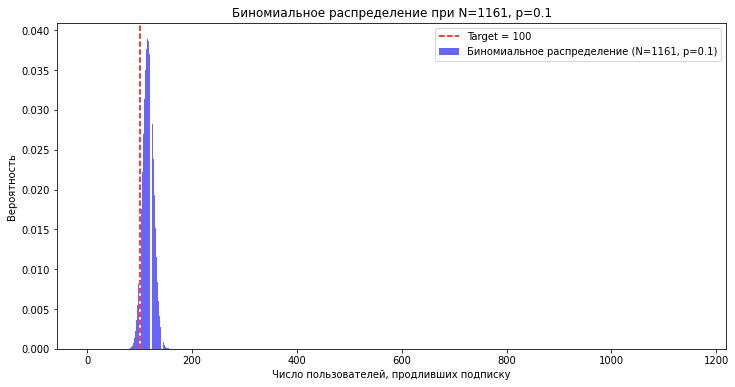

Минимальное количество промокодов, чтобы с вероятностью 95% достичь 100 продлений: 1161


In [75]:
# задаем известные по условию задачи параметры
p = 0.1  # вероятность продления подписки 10%
target = 100  # минимальное число пользователей, которые должны продлить подписку
fail_prob = 0.05  # максимально допустимая вероятность не выполнить план (не достичь 100 продлений) 5%

# подбираем минимальное N, при котором вероятность P(X < 100) ≤ 0.05
N = target
while st.binom.cdf(target - 1, N, p) > fail_prob:
    N += 1

# строим график биномиального распределения
x = np.arange(0, N + 1)
y = st.binom.pmf(x, N, p)

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='blue', alpha=0.6, label=f'Биномиальное распределение (N={N}, p={p})')
plt.axvline(target, color='red', linestyle='dashed', label=f'Target = {target}')
plt.xlabel('Число пользователей, продливших подписку')
plt.ylabel('Вероятность')
plt.title(f'Биномиальное распределение при N={N}, p={p}')
plt.legend()
plt.show()

# выводим результат
print(f"Минимальное количество промокодов, чтобы с вероятностью {1 - fail_prob:.0%} достичь {target} продлений: {N}")


Для выполнения плана в 100 продлений подписок необходимо разослать не менее 1161 промокода.

#### Задача 2: push-уведомления

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. 

Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации биномиального распределения постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

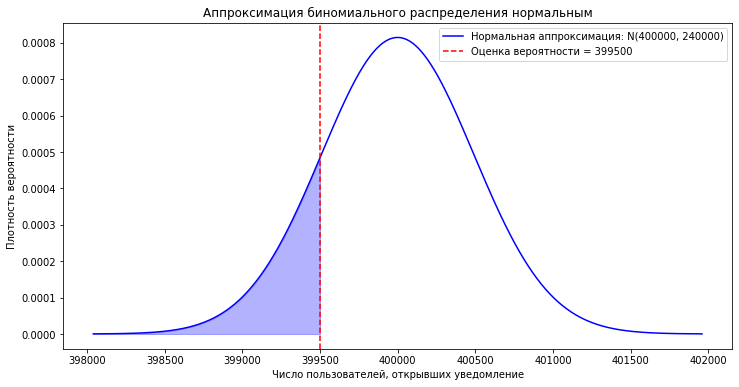

Вероятность того, что уведомление откроют не более 399500 пользователей: 0.1537


In [76]:
# зададим условия задачи
N = 1000000  # количество разосланных уведомлений
p = 0.4  # вероятность открытия уведомления
threshold = 399500  # оценка вероятности

# нормальная аппроксимация
mu = N * p 
sigma = np.sqrt(N * p * (1 - p))

# вероятность P(X ≤ 399500)
probability = st.norm.cdf(threshold, mu, sigma)

# построение графика нормального распределения
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = st.norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, y, label=f'Нормальная аппроксимация: N({mu:.0f}, {sigma**2:.0f})', color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', label=f'Оценка вероятности = {threshold}')
plt.fill_between(x, y, where=(x <= threshold), color='blue', alpha=0.3)  # Закрашиваем левую часть
plt.xlabel('Число пользователей, открывших уведомление')
plt.ylabel('Плотность вероятности')
plt.title('Аппроксимация биномиального распределения нормальным')
plt.legend()
plt.show()

# вывод результата
print(f"Вероятность того, что уведомление откроют не более {threshold} пользователей: {probability:.4f}")


Вероятность что пользователи откроют менее 399,5 тысяч уведомлений приблизительно равна 15,37%.

#### Промежуточный вывод

1. Для выполнения плана в 100 продлений подписок необходимо разослать не менее 1161 промокода.

2. Вероятность что пользователи откроют менее 399,5 тысяч уведомлений приблизительно равна 15,37%.

### Итоговый вывод

При подготовке данных к анализу пропусков не было обнаружено, в данных о пользователях были обнаружены 31 строка с дубликатами, дубликаты были удалены из датасета. Типы данных в целом корректны, в датасете с данными о поездках тип данных о дате поездки был приведен к корректному DateTime. 

В данных о продолжительности поездок обнаружено несоответствие времени и расстояний поездок - есть строки с большими по расстоянию поездками и временем поездки менее минуты. Эти строки оставлены без изменений, т.к. мы не знаем причин такого значения времени (это могут быть технические сбои при подсчете времени, ошибки выгрузки, акции с бесплатными минутами или бонусами), но в этих строках есть другие важные для анализа данные и поэтому мы их не удаляем.

<h1>Исследовательский анализ данных</h1>

<b>Города</b>

В данных представлены информация о 8 городах, в которых работал сервис GoFast. Пятигорск имеет наибольшее количество пользователей 219, в то время как Москва представлена наименьшим количеством пользователей 168.

<b>Подписки</b>

В данных представлено два типа подписки:
- free (без помесячной платы, но с более высокими ценами за минуту и старт поездки)
- ultra (с помесячной платой, но с более низкими ценами за минуту и отсутствием стартовой платы)

Наибольшая доля пользователей не использует подписку - 54.4%, но пользователей с платной подпиской все таки довольно большое количество - 45.6%.

<b>Возраст пользователей</b>

Диапазон возрастов пользователей представлен значениями от 12 до 43 лет.
Средний возраст клиентов — 25 лет, основная масса подписчиков приходится на диапазон от 21 до 28 лет.

<b>Расстояние поездок</b>

Основная масса поездок находится в диапазоне от 2500 до 3100 метров, однако в данных есть выдающиеся значения (поездки более 5700 метров и менее 700 метров).
Взаимосвязи дистанций поездок с временем года и/или городом не обнаружено.

<b>Время поездок</b>

Основная масса поездок находится в диапазоне приблизительно от 13 до 22 минут, однако есть поездки продолжительностью до 2-х минут и около 40 минут.
Взаимосвязи продолжительности поездок с временем года и/или городом не обнаружено.
В данных есть поездки менее 1 минуты на расстояния более 4, 5 и даже 6 км. Это может быть какой-либо технический сбой в подсчете времени поездок, ошибка при выгрузке данных или это могут быть поездки в рамках какой-либо акции с бесплатными минутами или бонусами. Для выяснения причин такого несоответствия времени и расстояний поездок понадобятся дополнительные данные для анализа. Эти строки не удаляем и оставляем как есть, т.к. в них присутствует важная информация для последующего анализа.

<h1>Объединение данных</h1>

Для дальнейшей работы данные были объеденены в единый датасет, было добавлено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, данные о помесячной выручке для каждого пользователя. 
Из общего датасета были выделены два отдельных датасета с данными только о пользователях с подпиской и только о пользователях без подписки.

У пользователей без подписки наблюдается более равномерное распределение поездок по времени и расстоянию. Они чаще совершают короткие поездки (до 1500 метров и до 15 минут), тажке они совершают более длинные поездки за короткий срок.
Пользователи с подпиской в основном совершают поездки приблизительно от 2500 до 3500 метров, также они совершают более длительные по времени поездки, но на расстояния короче, чем пользователи без подписки (до 5500 метров).

Исходя из этих данных можно предположить, что пользователи без подписки чаще совершают короткие поездки т.к. могут только знакомиться с сервисом, тестировать удобство приложения и самокаты. А более короткие по времени и длинные по расстоянию поездки могут быть обусловлены желанием поскорее завершить поездку и сэкономить деньги на поминутном тарифе.

По данным видно, что существует существенное различие в поведении пользователей с подпиской и без.
Пользователи без подписки имеют более равномерное распределение как по времени, так и по расстоянию поездок. Они совершают чуть более длинные поездки за более короткое время, а также чаще совершают короткие по расстоянию и непродолжительные по времени поездки.

Пользователи с подпиской чаще совершают долгие по времени поездки, но на меньшее расстояние. Также пользователи с подпиской гораздо реже совершают короткие по расстоянию поездки.

Все поездки продолжительностью менее 1 минуты приходятся на пользователей без подписки. 
Возможно это поездки совершенные в рамкай какой-либо акции с бесплатными минутами или поездками для новых пользователей или пользователей без подписки.

Вероятно, пользователи без подписки, которые совершают короткие, но продолжительные поездки, включают в себя новых пользователей, которые только изучают сервис.

<h1>Проверка гипотез</h1>

1. Гипотеза 1: тратят ли пользователи с подпиской больше времени на поездки?

Пользователи с подпиской тратят на поездки в среднем на ~1 минуту больше времени, чем пользователи без подписки.

2. Гипотеза 2: пользователи с подпиской проезжают не более 3130 метров за одну поездку.

Расстояния поездок пользователей с подпиской не превышает 3130 метров.

3. Гипотеза 3: помесячная выручка пользователей с подпиской превышает выручку пользователей без подписки.

Ежемесячная выручка пользователей с подпиской больше, чем у пользователей без подписки. 

4. Гипотеза 4: повлияет ли обновление сервера на количество обращений в техподдержку? (теория)

Для проверки предположения о влиянии работ на сервере на количество обращений в тех поддержку необходимо провести двухвыборочный t-тест для зависимых выборок, в котором будут сравнены значения среднего количества обращений в техподдержку до и после внесения изменений.

<h1>Дополнительные задачи</h1>

1.  Задача 1: акция с промокодами

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

<b>Ответ:</b> Для выполнения плана в 100 продлений подписок необходимо разослать не менее 1161 промокода.

2. Задача 2: push-уведомления

Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации биномиального распределения постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

<b>Ответ:</b> Вероятность что пользователи откроют менее 399,5 тысяч уведомлений приблизительно равна 15,37%.
